## Analyzing suspicious audio files

Using urlib library to install thinkdsp module

In [1]:
from thinkdsp import read_wave

Installing all the necessary modules and library

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from thinkdsp import read_wave, CosSignal
from scipy import signal

# from thinkdsp import read_wave, decorate, CosSignal

### Test first audio file

In [3]:
wave = read_wave('Ex3_files/Ex3_sound2.wav')
wave.make_audio()

In [4]:
start_of_audio = 0.0
length_of_audio = wave.duration
waveform = wave.segment(start_of_audio, length_of_audio)

Text(0, 0.5, 'Signal Amplitude')

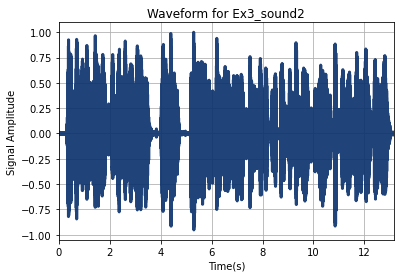

In [5]:
plt.title('Waveform for Ex3_sound2')

waveform.plot(alpha = 0.9)
plt.xlim([0, waveform.ts[-1]]);

plt.grid()
plt.xlabel('Time(s)')
plt.ylabel('Signal Amplitude')

In [6]:
spectrum = wave.make_spectrum()

Text(0, 0.5, 'Magnitude Spectrum')

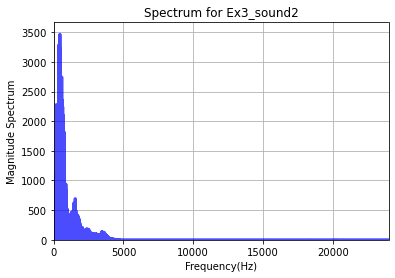

In [7]:
plt.title('Spectrum for Ex3_sound2')

spectrum.plot(alpha = 0.7, color = 'b')
plt.xlim([0, spectrum.fs[-1]]);
plt.ylim([0, max(200 + spectrum.amps)])

plt.grid()
plt.xlabel('Frequency(Hz)')
plt.ylabel('Magnitude Spectrum')

### Test second audio file

In [8]:
wave = read_wave('Ex3_files/Ex3_sound3.wav')
wave.make_audio()

In [9]:
start_of_audio = 0.0
length_of_audio = wave.duration
waveform = wave.segment(start_of_audio, length_of_audio)

Text(0, 0.5, 'Signal Amplitude')

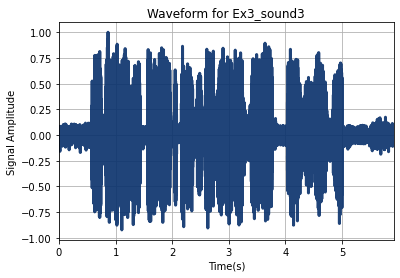

In [10]:
plt.title('Waveform for Ex3_sound3')

waveform.plot(alpha = 0.9)
plt.xlim([0, waveform.ts[-1]]);

plt.grid()
plt.xlabel('Time(s)')
plt.ylabel('Signal Amplitude')

In [11]:
spectrum = wave.make_spectrum()

Text(0, 0.5, 'Magnitude Spectrum')

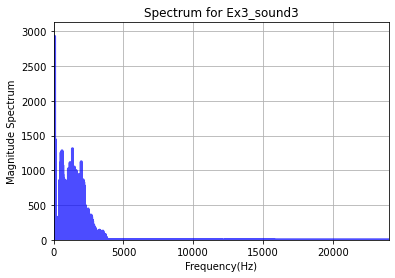

In [12]:
plt.title('Spectrum for Ex3_sound3')

spectrum.plot(alpha = 0.7, color = 'b')
plt.xlim([0, spectrum.fs[-1]]);
plt.ylim([0, max(200 + spectrum.amps)])

plt.grid()
plt.xlabel('Frequency(Hz)')
plt.ylabel('Magnitude Spectrum')

### Test third audio file

In [13]:
wave = read_wave('Ex3_files/Ex3_sound4.wav')
wave.make_audio()

In [14]:
start_of_audio = 0.0
length_of_audio = wave.duration
waveform = wave.segment(start_of_audio, length_of_audio)

Text(0, 0.5, 'Signal Amplitude')

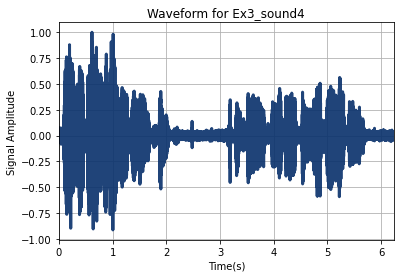

In [15]:
plt.title('Waveform for Ex3_sound4')

waveform.plot(alpha = 0.9)
plt.xlim([0, waveform.ts[-1]]);

plt.grid()
plt.xlabel('Time(s)')
plt.ylabel('Signal Amplitude')

In [16]:
spectrum = wave.make_spectrum()

Text(0, 0.5, 'Magnitude Spectrum')

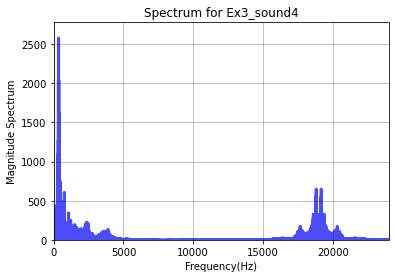

In [17]:
plt.title('Spectrum for Ex3_sound4')

spectrum.plot(alpha = 0.7, color = 'b')
plt.xlim([0, spectrum.fs[-1]]);
plt.ylim([0, max(200 + spectrum.amps)])

plt.grid()
plt.xlabel('Frequency(Hz)')
plt.ylabel('Magnitude Spectrum')

### Frequency out of hearing range for sound 4, hence it contains secret message

### Get the sampling rate and period

In [18]:
sampling_period = waveform.ts[1]
sampling_rate = 1/sampling_period
print(sampling_rate)

bin_frequency = spectrum.freq_res
bandwidth = spectrum.fs[-1]
bin = sampling_rate/bin_frequency
nyquist_rate = spectrum.max_freq

48000.0


### Plotting the speech signal

Text(0, 0.5, 'Magnitude Spectrum')

<Figure size 432x288 with 0 Axes>

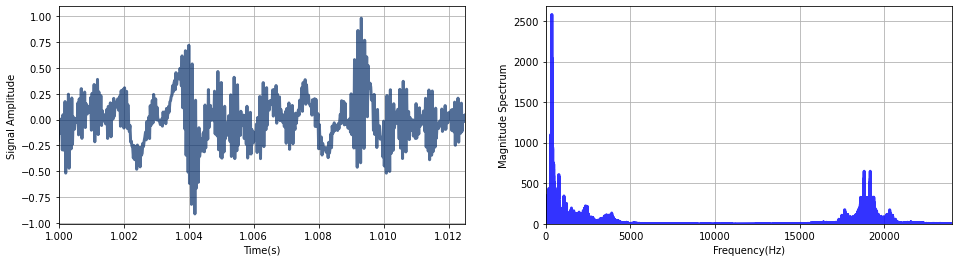

In [19]:
plt.clf()

FIGURE1_SIZE = 4
f, axes = plt.subplots(1, 2, figsize = (FIGURE1_SIZE*4, FIGURE1_SIZE))

plt.subplot(121)
waveform.plot(label = 'waveform')
plt.xlim([1, 1 + 1/80]);

plt.grid()
plt.xlabel('Time(s)')
plt.ylabel('Signal Amplitude')

###################################################################

plt.subplot(122)
spectrum.plot(alpha = 0.8, color = 'b', label = 'spectrum')
plt.xlim([0, spectrum.fs[-1]])
plt.ylim([0, max(spectrum.amps + 100)])

plt.grid()
plt.xlabel('Frequency(Hz)')
plt.ylabel('Magnitude Spectrum')

### Plotting the carrier

In [20]:
t = waveform.ts
fc = 19000
cutoff = 3000

Text(0, 0.5, 'Magnitude Spectrum')

<Figure size 432x288 with 0 Axes>

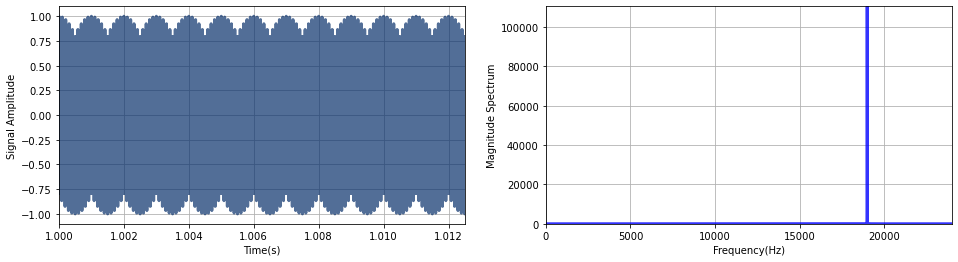

In [21]:
plt.clf()

FIGURE1_SIZE = 4
f, axes = plt.subplots(1, 2, figsize = (FIGURE1_SIZE*4, FIGURE1_SIZE))

plt.subplot(121)
carrier = CosSignal(freq = fc, amp = 1.0, offset = 0)
carrier = carrier.make_wave(duration = waveform.duration, start = 0, framerate = sampling_rate)
carrier.plot(label = '???')
plt.xlim([1, 1 + 1/80]);

plt.grid()
plt.xlabel('Time(s)')
plt.ylabel('Signal Amplitude')

###################################################################

plt.subplot(122)
carrier_spectrum = carrier.make_spectrum()
carrier_spectrum.plot(color = 'b', alpha = 0.8, label = 'carrier spectrum')
plt.xlim([0, carrier_spectrum.fs[-1]])
plt.ylim([0, max(carrier_spectrum.amps + 100)])

plt.grid()
plt.xlabel('Frequency(Hz)')
plt.ylabel('Magnitude Spectrum')

### Plot the remodulated signal

Text(0, 0.5, 'Magnitude Spectrum')

<Figure size 432x288 with 0 Axes>

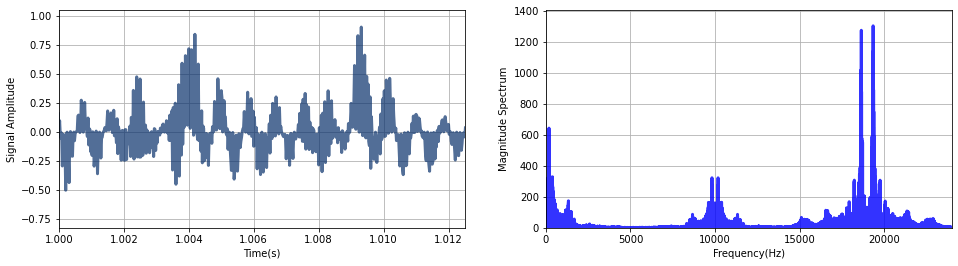

In [22]:
plt.clf()

FIGURE1_SIZE = 4
f, axes = plt.subplots(1, 2, figsize = (FIGURE1_SIZE*4, FIGURE1_SIZE))

plt.subplot(121)
re_modulated = waveform * carrier
re_modulated.plot(label = 're-modulated signal')
plt.xlim([1, 1 + 1/80]);

plt.grid()
plt.xlabel('Time(s)')
plt.ylabel('Signal Amplitude')

###################################################################

plt.subplot(122)
re_modulated_spectrum = re_modulated.make_spectrum()
re_modulated_spectrum.plot(color = 'b', alpha = 0.8, label = 're-modulated spectrum')
plt.xlim([0, re_modulated_spectrum.fs[-1]])
plt.ylim([0, max(re_modulated_spectrum.amps + 100)])

plt.grid()
plt.xlabel('Frequency(Hz)')
plt.ylabel('Magnitude Spectrum')

### Plot the lowpass filtered signal

Text(0, 0.5, 'Magnitude Spectrum')

<Figure size 432x288 with 0 Axes>

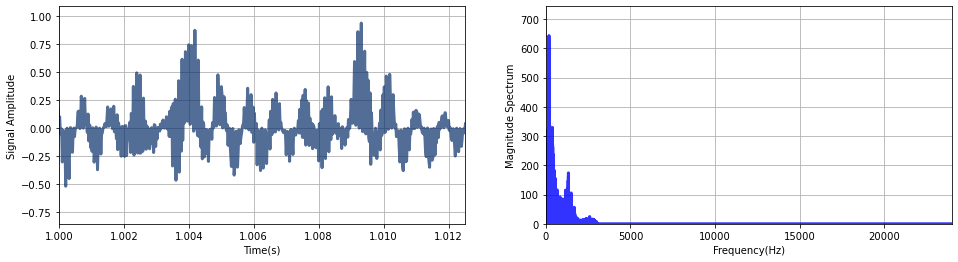

In [23]:
plt.clf()

FIGURE1_SIZE = 4
f, axes = plt.subplots(1, 2, figsize = (FIGURE1_SIZE*4, FIGURE1_SIZE))

plt.subplot(121)
filtered = re_modulated_spectrum.make_wave()
filtered.normalize()
filtered.plot(label = 'lowpass filtered signal')
plt.xlim([1, 1 + 1/80]);

plt.grid()
plt.xlabel('Time(s)')
plt.ylabel('Signal Amplitude')

###################################################################

plt.subplot(122)
re_modulated_spectrum.low_pass(cutoff)
re_modulated_spectrum.plot(color = 'b', alpha = 0.8, label = 'lowpass filtered spectrum')
plt.xlim([0, re_modulated_spectrum.fs[-1]])
plt.ylim([0, max(re_modulated_spectrum.amps + 100)])

plt.grid()
plt.xlabel('Frequency(Hz)')
plt.ylabel('Magnitude Spectrum')

In [24]:
secret_message = filtered.segment(0, 2)
secret_message.make_audio()